In [297]:
#dependencies
from pathlib import Path
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from datetime import datetime

Main_csv_path = Path("Resources/18100205.csv")
Metadata_csv_path = Path("Resources/18100205_MetaData.csv")

Main_StatsCan_IndexDF = pd.read_csv(Main_csv_path, encoding="UTF-8-Sig")
Metadata_DF = pd.read_csv(Metadata_csv_path, encoding="UTF-8-Sig")

Main_StatsCan_IndexDF.tail()

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
61075,2023-05,"Vancouver, British Columbia",2011S0503933,House only,"Index, 201612=100",347,units,0,v111955557,39.2,126.4,NaN,NaN,NaN,1
61076,2023-05,"Vancouver, British Columbia",2011S0503933,Land only,"Index, 201612=100",347,units,0,v111955558,39.3,121.0,E,NaN,NaN,1
61077,2023-05,"Victoria, British Columbia",2011S0503935,Total (house and land),"Index, 201612=100",347,units,0,v111955559,40.1,121.9,NaN,NaN,NaN,1
61078,2023-05,"Victoria, British Columbia",2011S0503935,House only,"Index, 201612=100",347,units,0,v111955560,40.2,127.9,NaN,NaN,NaN,1
61079,2023-05,"Victoria, British Columbia",2011S0503935,Land only,"Index, 201612=100",347,units,0,v111955561,40.3,110.6,E,NaN,NaN,1


In [298]:
Metadata_DF.head()

,Cube Title,Product Id,CANSIM Id,URL,Cube Notes,Archive Status,Frequency,Start Reference Period,End Reference Period,Total number of dimensions
"New housing price index, monthly",18100205,327-0056,https://www150.statcan.gc.ca/t1/tbl1/en/tv.act...,1;2;3;13;14,CURRENT - a cube available to the public and t...,Monthly,1981-01-01,2023-05-01,2.0,NaN
Dimension ID,Dimension name,Dimension Notes,Dimension Definitions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,New housing price indexes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dimension ID,Member Name,Classification Code,Member ID,Parent Member ID,Terminated,Member Notes,Member Definitions,NaN,NaN,NaN


In [299]:
# Select necessary columns for initial data cleaning processes.
reduced_main_df = Main_StatsCan_IndexDF[["REF_DATE","GEO","New housing price indexes","UOM","VALUE","STATUS","DECIMALS"]]		

#Rename columns for code readability.

reduced_main_renamed_df =reduced_main_df.rename(columns={"New housing price indexes": "NewHousePrice_Index_Type" })

#Initial Rename Approach Below:
#reduced_main_df.columns.values[2] = "NewHousePrice_Index_Type" 
#Replaced column name of "New housing price indexes".

reduced_main_renamed_df.tail()

,REF_DATE,GEO,NewHousePrice_Index_Type,UOM,VALUE,STATUS,DECIMALS
61075,2023-05,"Vancouver, British Columbia",House only,"Index, 201612=100",126.4,NaN,1
61076,2023-05,"Vancouver, British Columbia",Land only,"Index, 201612=100",121.0,E,1
61077,2023-05,"Victoria, British Columbia",Total (house and land),"Index, 201612=100",121.9,NaN,1
61078,2023-05,"Victoria, British Columbia",House only,"Index, 201612=100",127.9,NaN,1
61079,2023-05,"Victoria, British Columbia",Land only,"Index, 201612=100",110.6,E,1


In [300]:
#Validate the data types within our reduced_main_renamed_df
#Confirms that we can split the object columns as text.

reduced_main_renamed_df.dtypes

REF_DATE                     object
GEO                          object
NewHousePrice_Index_Type     object
UOM                          object
VALUE                       float64
STATUS                       object
DECIMALS                      int64
dtype: object

In [301]:
#Create VAR of column as a series to add an index to each row in preparation of split text by Delimiter function.

Orig_Geo_series = pd.Series(reduced_main_df["GEO"]) #TEST of Initial Output via => print(Orig_Geo_series)

#SPLIT data by delimiter 
Geo_Split = Orig_Geo_series.str.split(',')

#Fetch by column index the first part of the original VAR column.
Geo_CityRow = Geo_Split.str.get(0) #access the first element for eventual "column1"

print(Geo_CityRow)

0                 Canada
1                 Canada
2                 Canada
3        Atlantic Region
4        Atlantic Region
              ...       
61075          Vancouver
61076          Vancouver
61077           Victoria
61078           Victoria
61079           Victoria
Name: GEO, Length: 61080, dtype: object


In [302]:
#Fetch by column index the second part of the original VAR column.
Geo_ProvRow = Geo_Split.str.get(1) #access the first element for eventual "column2"

print(Geo_ProvRow)

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
               ...        
61075     British Columbia
61076     British Columbia
61077     British Columbia
61078     British Columbia
61079     British Columbia
Name: GEO, Length: 61080, dtype: object


In [303]:
#Leverage pd.series() index on Original DF column to join the delimited data back together.
#Accomplished by the usage of "axis=1"

Manual_Merge_Geo = pd.concat([Geo_CityRow,Geo_ProvRow], axis=1) #axis=1 is using "column 1" to merge. Being the column created by pd.series() + #TEST of Initial Output via => print(Manual_Merge_Geo)

#Rename Columns from both duplicating "GEO" using the column index.
#Column Index Approach and Rename Options presented via => https://www.geeksforgeeks.org/rename-specific-columns-in-pandas/
#Team decision => BEST PRACTICE TO RENAME RIGHT AWAY "HERE" ... to save coding time later.
Manual_Merge_Geo.columns.values[0] = "City_Region"
Manual_Merge_Geo.columns.values[1] = "Province"

print(Manual_Merge_Geo)

           City_Region           Province
0               Canada                NaN
1               Canada                NaN
2               Canada                NaN
3      Atlantic Region                NaN
4      Atlantic Region                NaN
...                ...                ...
61075        Vancouver   British Columbia
61076        Vancouver   British Columbia
61077         Victoria   British Columbia
61078         Victoria   British Columbia
61079         Victoria   British Columbia

[61080 rows x 2 columns]


In [304]:
#Create VAR of column as a series to add an index to each row in preparation of split text by Delimiter function.
Orig_Year_series = pd.Series(reduced_main_df["REF_DATE"])

#SPLIT data by delimiter 
Year_Split = Orig_Year_series.str.split('-')

#Fetch by column index the second part of the original VAR column.
Row_Year = Year_Split.str.get(0) #access the first element for eventual "column1"
Row_Month = Year_Split.str.get(1) #access the second element for eventual "column2"

#REMOVED BELOW as a script test. These outputs end up "inserting to row#1 (as index=0)" ... rather than naming the column as expected.
#Row_Year.values[0] = "Year"  #NOTE => 
#Row_Month.values[0] = "Month" #NOTE => 

print(Row_Year)
print(Row_Month)


0        1981
1        1981
2        1981
3        1981
4        1981
         ... 
61075    2023
61076    2023
61077    2023
61078    2023
61079    2023
Name: REF_DATE, Length: 61080, dtype: object
0        01
1        01
2        01
3        01
4        01
         ..
61075    05
61076    05
61077    05
61078    05
61079    05
Name: REF_DATE, Length: 61080, dtype: object


In [305]:
#Leverage initial pd.series() index on Original DF column to join the delimited data back together.
#Accomplished by the usage of "axis=1"

Manual_Merge_date = pd.concat([Row_Year,Row_Month], axis=1) #axis=1 is using "column 1" to merge.

#Rename Columns from both duplicating "GEO" using the column index.
#Column Index Approach and Rename Options presented via => https://www.geeksforgeeks.org/rename-specific-columns-in-pandas/
#Team decision => BEST PRACTICE TO RENAME RIGHT AWAY "HERE" ... to save coding time later.
Manual_Merge_date.columns.values[0] = "Year"
Manual_Merge_date.columns.values[1] = "Month"

#KEY REMINDER ... if we need the month to be transformed into "1" intstead of "01" (IE: INT from TEXT/VARCHAR) ... here is probably the best place as well.

print(Manual_Merge_date)

       Year Month
0      1981    01
1      1981    01
2      1981    01
3      1981    01
4      1981    01
...     ...   ...
61075  2023    05
61076  2023    05
61077  2023    05
61078  2023    05
61079  2023    05

[61080 rows x 2 columns]


In [306]:
#via => https://appdividend.com/2020/06/02/pandas-concat-method-example-in-python/
#JOIN Split GEO Columns to Original DF
GeoUpdated_DF = pd.concat([reduced_main_renamed_df,Manual_Merge_Geo],axis=1,join='outer') # ,join_axes=None,ignore_index=False)
print(GeoUpdated_DF)

#JOIN Split Year+Month Columns to GeoUpdated_DF
DateUpdated_DF = pd.concat([GeoUpdated_DF,Manual_Merge_date],axis=1,join='outer')
print(DateUpdated_DF)


      REF_DATE                          GEO NewHousePrice_Index_Type  \
0      1981-01                       Canada   Total (house and land)   
1      1981-01                       Canada               House only   
2      1981-01                       Canada                Land only   
3      1981-01              Atlantic Region   Total (house and land)   
4      1981-01              Atlantic Region               House only   
...        ...                          ...                      ...   
61075  2023-05  Vancouver, British Columbia               House only   
61076  2023-05  Vancouver, British Columbia                Land only   
61077  2023-05   Victoria, British Columbia   Total (house and land)   
61078  2023-05   Victoria, British Columbia               House only   
61079  2023-05   Victoria, British Columbia                Land only   

                     UOM  VALUE STATUS  DECIMALS      City_Region  \
0      Index, 201612=100   38.2    NaN         1           Canada 

In [307]:
#Select newly merged columns and reorder untouched columns from the initial reduced_main_renamed_df and our new concat DFs to establish a DF for Analysis purposes.

Analysis_DF = DateUpdated_DF[["Year","Month","City_Region","Province","NewHousePrice_Index_Type","UOM","VALUE","STATUS","DECIMALS"]]

Analysis_DF

,Year,Month,City_Region,Province,NewHousePrice_Index_Type,UOM,VALUE,STATUS,DECIMALS
0,1981,01,Canada,NaN,Total (house and land),"Index, 201612=100",38.2,NaN,1
1,1981,01,Canada,NaN,House only,"Index, 201612=100",36.1,NaN,1
2,1981,01,Canada,NaN,Land only,"Index, 201612=100",40.6,E,1
3,1981,01,Atlantic Region,NaN,Total (house and land),"Index, 201612=100",NaN,..,1
4,1981,01,Atlantic Region,NaN,House only,"Index, 201612=100",NaN,..,1
...,...,...,...,...,...,...,...,...,...
61075,2023,05,Vancouver,British Columbia,House only,"Index, 201612=100",126.4,NaN,1
61076,2023,05,Vancouver,British Columbia,Land only,"Index, 201612=100",121.0,E,1
61077,2023,05,Victoria,British Columbia,Total (house and land),"Index, 201612=100",121.9,NaN,1
61078,2023,05,Victoria,British Columbia,House only,"Index, 201612=100",127.9,NaN,1


In [308]:
#Remove "junk data" columns from the Analysis DF based on StatsCan Legend and our analysis needs.

StatusClean_Analysis_DF = Analysis_DF.query("STATUS not in ['E', 'x', '..']") #QUERY fuction delivers to python "memory" a "true/false" outcome. Via URL => https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html

TotalPriceIndex_Analysis_DF = StatusClean_Analysis_DF.query("NewHousePrice_Index_Type not in ['House only','Land only']")

TotalPriceIndex_Analysis_DF

,Year,Month,City_Region,Province,NewHousePrice_Index_Type,UOM,VALUE,STATUS,DECIMALS
0,1981,01,Canada,NaN,Total (house and land),"Index, 201612=100",38.2,NaN,1
9,1981,01,St. John's,Newfoundland and Labrador,Total (house and land),"Index, 201612=100",36.1,NaN,1
27,1981,01,Saint John,Fredericton,Total (house and land),"Index, 201612=100",55.9,NaN,1
33,1981,01,Québec,Quebec,Total (house and land),"Index, 201612=100",30.1,NaN,1
42,1981,01,Montréal,Quebec,Total (house and land),"Index, 201612=100",28.5,NaN,1
...,...,...,...,...,...,...,...,...,...
61065,2023,05,Edmonton,Alberta,Total (house and land),"Index, 201612=100",108.2,NaN,1
61068,2023,05,British Columbia,NaN,Total (house and land),"Index, 201612=100",127.0,NaN,1
61071,2023,05,Kelowna,British Columbia,Total (house and land),"Index, 201612=100",123.8,NaN,1
61074,2023,05,Vancouver,British Columbia,Total (house and land),"Index, 201612=100",127.8,NaN,1


In [309]:
#Esablish list of cities to be filtered from the TotalPriceIndex_Analysis_DF
desired_cities = ['Toronto', 'Vancouver', 'Montréal']

#Create empty array to enable Dictionary to be populated with data from Established list of cities.
filtered_city_data = {}

#Iterate through the TotalPriceIndex_Analysis_DF['City_Region] column with established list of cities.
for city in desired_cities:
    city_filtered_df = TotalPriceIndex_Analysis_DF[TotalPriceIndex_Analysis_DF['City_Region'] == city]

#Place iterated/fetched list from TotalPriceIndex_Analysis_DF['City_Region] column into city_filtered_df
    filtered_city_data[city] = city_filtered_df

# Review Expected Output by transforming items within the array/dictionary to Print the data for all cities and break print() output up for user readability.
for city, city_df in filtered_city_data.items():
    print(f"Data for {city}:")
    print(city_df)
    print("\n")

Data for Toronto:
       Year Month City_Region  Province NewHousePrice_Index_Type  \
57     1981    01     Toronto   Ontario   Total (house and land)   
177    1981    02     Toronto   Ontario   Total (house and land)   
297    1981    03     Toronto   Ontario   Total (house and land)   
417    1981    04     Toronto   Ontario   Total (house and land)   
537    1981    05     Toronto   Ontario   Total (house and land)   
...     ...   ...         ...       ...                      ...   
60537  2023    01     Toronto   Ontario   Total (house and land)   
60657  2023    02     Toronto   Ontario   Total (house and land)   
60777  2023    03     Toronto   Ontario   Total (house and land)   
60897  2023    04     Toronto   Ontario   Total (house and land)   
61017  2023    05     Toronto   Ontario   Total (house and land)   

                     UOM  VALUE STATUS  DECIMALS  
57     Index, 201612=100   28.0    NaN         1  
177    Index, 201612=100   28.5    NaN         1  
297    Index

In [310]:
#Extract sample data to validate that the STATUS not in funciton above was successful and to store within the Repo as a data source.

#Establish Path VARs to enable Output produced to be mapped correctly within the Repo.
Output_Folder = 'Output/'
Output_file = Output_Folder + 'city_filtered_df.csv'

# Concatenate the 3 city filtered dataframes from the desired list of cities and reset the index of the output.
combined_data = pd.concat(filtered_city_data.values(), ignore_index=True)

# Save the 3 combined city_filtered_data dataframes into a single CSV file
combined_data.to_csv(Output_file, index=False, encoding='utf-8-sig') # for "Montréal" producing issues ... ref for variation in export encoding https://stackoverflow.com/questions/57152985/what-is-the-difference-between-utf-8-and-utf-8-sig


In [311]:
#Validate output for Notebook user.
Final_City_Filtered_DF = combined_data
print(Final_City_Filtered_DF)

      Year Month City_Region  Province NewHousePrice_Index_Type  \
0     1981    01     Toronto   Ontario   Total (house and land)   
1     1981    02     Toronto   Ontario   Total (house and land)   
2     1981    03     Toronto   Ontario   Total (house and land)   
3     1981    04     Toronto   Ontario   Total (house and land)   
4     1981    05     Toronto   Ontario   Total (house and land)   
...    ...   ...         ...       ...                      ...   
1522  2023    01    Montréal    Quebec   Total (house and land)   
1523  2023    02    Montréal    Quebec   Total (house and land)   
1524  2023    03    Montréal    Quebec   Total (house and land)   
1525  2023    04    Montréal    Quebec   Total (house and land)   
1526  2023    05    Montréal    Quebec   Total (house and land)   

                    UOM  VALUE STATUS  DECIMALS  
0     Index, 201612=100   28.0    NaN         1  
1     Index, 201612=100   28.5    NaN         1  
2     Index, 201612=100   29.8    NaN        

In [312]:
#Use Path to import comparative price data built by the team to enable comparative analysis on the storytelling from the StatsCan dataset. 

Housing_Prices_by_year = Path("Resources/Housing_Prices_by_year.csv")
Housing_Prices_by_year_df = pd.read_csv(Housing_Prices_by_year, encoding="UTF-8-Sig")

#Specifically this data is to establish observations assoicated to the generalized quality of Canadian data on the Housing Market. For example, it's expected that from a regression perspective the average prices are compare against the StatsCan Index.

print(Housing_Prices_by_year_df)

     month_Year Vancouver   Toronto Montreal
0    2012-01-01    660,600  420,950  284,000
1    2012-02-01    670,900  456,537      NaN
2    2012-03-01    679,000  450,750      NaN
3    2012-04-01    683,800  464,075      NaN
4    2012-05-01    625,100  472,839      NaN
..          ...        ...      ...      ...
127  2022-08-01  1,180,500  939,625  523,700
128  2022-09-01  1,155,300  957,500  511,400
129  2022-10-01  1,148,900  964,125  504,800
130  2022-11-01  1,131,600  964,125  501,000
131  2022-12-01  1,114,300  939,125  516,400

[132 rows x 4 columns]


In [313]:
#Validating the Structure and Data Type of the "date" data from the .csv as Date Format input from "user" (the csv data set) to Python's/Panda's processing needs.
#Panda's format requirements found via => https://www.w3schools.com/python/python_datetime.asp
print(Housing_Prices_by_year_df['month_Year'])

#Validating what was loaded as DataTypes from the .csv of our new Housing Price DataSet.

print(Housing_Prices_by_year_df.dtypes)

0      2012-01-01
1      2012-02-01
2      2012-03-01
3      2012-04-01
4      2012-05-01
          ...    
127    2022-08-01
128    2022-09-01
129    2022-10-01
130    2022-11-01
131    2022-12-01
Name: month_Year, Length: 132, dtype: object
month_Year    object
Vancouver     object
Toronto       object
Montreal      object
dtype: object


In [314]:
#Rename columns for code error appearing associated to "Vancouver" (Likely a "text trim")  issue from the team's .csv.

Housing_Prices_by_year_df.columns.values[1] = "Vancouver"
Housing_Prices_by_year_df.columns.values[2] = "Toronto"
Housing_Prices_by_year_df.columns.values[3] = "Montreal"

#print(Housing_Prices_by_year_df)

In [315]:
#1 => Goal of next step is to "establish" a column being similar to StatsCan original data of "YYYY-MM".
#2 => Leveraged following URL to establish what our "format=" parameter code has to be ... based on OUR USER INPUT DATA (IE: the .csv.) URL => https://www.w3schools.com/python/python_datetime.asp

DateInsert_Month_Year_DF = pd.Series(pd.to_datetime(Housing_Prices_by_year_df['month_Year'], format='%Y-%m-%d', errors = 'coerce'))

#Validate conversion was successful.
print(DateInsert_Month_Year_DF.to_dict())
print(DateInsert_Month_Year_DF)


{0: Timestamp('2012-01-01 00:00:00'), 1: Timestamp('2012-02-01 00:00:00'), 2: Timestamp('2012-03-01 00:00:00'), 3: Timestamp('2012-04-01 00:00:00'), 4: Timestamp('2012-05-01 00:00:00'), 5: Timestamp('2012-06-01 00:00:00'), 6: Timestamp('2012-07-01 00:00:00'), 7: Timestamp('2012-08-01 00:00:00'), 8: Timestamp('2012-09-01 00:00:00'), 9: Timestamp('2012-10-01 00:00:00'), 10: Timestamp('2012-11-01 00:00:00'), 11: Timestamp('2012-12-01 00:00:00'), 12: Timestamp('2013-01-01 00:00:00'), 13: Timestamp('2013-02-01 00:00:00'), 14: Timestamp('2013-03-01 00:00:00'), 15: Timestamp('2013-04-01 00:00:00'), 16: Timestamp('2013-05-01 00:00:00'), 17: Timestamp('2013-06-01 00:00:00'), 18: Timestamp('2013-07-01 00:00:00'), 19: Timestamp('2013-08-01 00:00:00'), 20: Timestamp('2013-09-01 00:00:00'), 21: Timestamp('2013-10-01 00:00:00'), 22: Timestamp('2013-11-01 00:00:00'), 23: Timestamp('2013-12-01 00:00:00'), 24: Timestamp('2014-01-01 00:00:00'), 25: Timestamp('2014-02-01 00:00:00'), 26: Timestamp('2014-0

In [316]:
#Rename original text date column for eventual deletion and maintain TXT column in new version of Housing_Prices_by_year_df.
TempRename_Housing_Prices_df = Housing_Prices_by_year_df.rename(columns={'month_Year': 'OLD_AsTXT_month_Year' })
print(TempRename_Housing_Prices_df)
print(TempRename_Housing_Prices_df.dtypes)

    OLD_AsTXT_month_Year  Vancouver  Toronto Montreal
0             2012-01-01    660,600  420,950  284,000
1             2012-02-01    670,900  456,537      NaN
2             2012-03-01    679,000  450,750      NaN
3             2012-04-01    683,800  464,075      NaN
4             2012-05-01    625,100  472,839      NaN
..                   ...        ...      ...      ...
127           2022-08-01  1,180,500  939,625  523,700
128           2022-09-01  1,155,300  957,500  511,400
129           2022-10-01  1,148,900  964,125  504,800
130           2022-11-01  1,131,600  964,125  501,000
131           2022-12-01  1,114,300  939,125  516,400

[132 rows x 4 columns]
OLD_AsTXT_month_Year    object
Vancouver               object
Toronto                 object
Montreal                object
dtype: object


In [317]:
#Add Date Column to TempRename_Housing_Prices_df to enable statistical analysis via "date between" functions if necessary.
DateClean_Housing_Prices_by_year_df = pd.concat((DateInsert_Month_Year_DF,TempRename_Housing_Prices_df), axis=1, join='outer')
#Noted Syntax Error => https://stackoverflow.com/questions/45175469/typeerror-concat-got-multiple-values-for-argument-axis

#Rename Column to include "asDate"
DateClean_Housing_Prices_by_year_df.columns.values[0] = 'month_Year_asDate'

#Validate Data Types and Output of above code.
print(DateClean_Housing_Prices_by_year_df.dtypes)
print(DateClean_Housing_Prices_by_year_df.to_dict())
print(DateClean_Housing_Prices_by_year_df)

month_Year_asDate       datetime64[ns]
OLD_AsTXT_month_Year            object
Vancouver                       object
Toronto                         object
Montreal                        object
dtype: object
{'month_Year_asDate': {0: Timestamp('2012-01-01 00:00:00'), 1: Timestamp('2012-02-01 00:00:00'), 2: Timestamp('2012-03-01 00:00:00'), 3: Timestamp('2012-04-01 00:00:00'), 4: Timestamp('2012-05-01 00:00:00'), 5: Timestamp('2012-06-01 00:00:00'), 6: Timestamp('2012-07-01 00:00:00'), 7: Timestamp('2012-08-01 00:00:00'), 8: Timestamp('2012-09-01 00:00:00'), 9: Timestamp('2012-10-01 00:00:00'), 10: Timestamp('2012-11-01 00:00:00'), 11: Timestamp('2012-12-01 00:00:00'), 12: Timestamp('2013-01-01 00:00:00'), 13: Timestamp('2013-02-01 00:00:00'), 14: Timestamp('2013-03-01 00:00:00'), 15: Timestamp('2013-04-01 00:00:00'), 16: Timestamp('2013-05-01 00:00:00'), 17: Timestamp('2013-06-01 00:00:00'), 18: Timestamp('2013-07-01 00:00:00'), 19: Timestamp('2013-08-01 00:00:00'), 20: Timestamp('201

In [318]:
#Parsing the OLD_asTXT_month_Year column into a data frame to enable the Concat to StatsCan's YYYY-MM data formatting.
#Below executes spliting the column by the "-"

HP_Month_Year_DF = DateClean_Housing_Prices_by_year_df['OLD_AsTXT_month_Year'].str.split('-')

HP_Year_Row = HP_Month_Year_DF.str.get(0) #access the first element for eventual "column1"
HP_Month_Row = HP_Month_Year_DF.str.get(1) #access the 2nd element for eventual "column2"
HP_Day_Row = HP_Month_Year_DF.str.get(2) #access the 3rd element for eventual "column3"

print(HP_Year_Row)
print(HP_Month_Row)
print(HP_Day_Row)

0      2012
1      2012
2      2012
3      2012
4      2012
       ... 
127    2022
128    2022
129    2022
130    2022
131    2022
Name: OLD_AsTXT_month_Year, Length: 132, dtype: object
0      01
1      02
2      03
3      04
4      05
       ..
127    08
128    09
129    10
130    11
131    12
Name: OLD_AsTXT_month_Year, Length: 132, dtype: object
0      01
1      01
2      01
3      01
4      01
       ..
127    01
128    01
129    01
130    01
131    01
Name: OLD_AsTXT_month_Year, Length: 132, dtype: object


In [319]:
#Merging the parsed data and recreating into a single DataFrame.

Manual_Merge_HP_Date =  pd.concat([HP_Year_Row,HP_Month_Row,HP_Day_Row], axis=1)
#Manual_Merge_HP_Date
Manual_Merge_HP_Date.columns.values[0] = "HousePrice_Year"
Manual_Merge_HP_Date.columns.values[1] = "HousePrice_Month"
Manual_Merge_HP_Date.columns.values[2] = "HousePrice_Day"

Manual_Merge_HP_Date

#EXAMPLE Code Reference from above.
#Manual_Merge_date = pd.concat([Row_Year,Row_Month], axis=1) #axis=1 is using "column 1" to merge.
#Manual_Merge_date
#Rename Options presented via => https://www.geeksforgeeks.org/rename-specific-columns-in-pandas/
#Manual_Merge_date.columns.values[0] = "Year"
#Manual_Merge_date.columns.values[1] = "Month"
#Manual_Merge_date
#BEST PRACTICE MIGHT BE TO RENAME RIGHT AWAY "HERE" ... to save coding time later.

,HousePrice_Year,HousePrice_Month,HousePrice_Day
0,2012,01,01
1,2012,02,01
2,2012,03,01
3,2012,04,01
4,2012,05,01
...,...,...,...
127,2022,08,01
128,2022,09,01
129,2022,10,01
130,2022,11,01


In [320]:
#This cell is merging back into the DateClean_Housing_Prices_by_year_df "user data" 

Full_HP_by_Year_DF = pd.concat([Manual_Merge_HP_Date, DateClean_Housing_Prices_by_year_df], axis=1,join='outer')
print(Full_HP_by_Year_DF)

    HousePrice_Year HousePrice_Month HousePrice_Day month_Year_asDate  \
0              2012               01             01        2012-01-01   
1              2012               02             01        2012-02-01   
2              2012               03             01        2012-03-01   
3              2012               04             01        2012-04-01   
4              2012               05             01        2012-05-01   
..              ...              ...            ...               ...   
127            2022               08             01        2022-08-01   
128            2022               09             01        2022-09-01   
129            2022               10             01        2022-10-01   
130            2022               11             01        2022-11-01   
131            2022               12             01        2022-12-01   

    OLD_AsTXT_month_Year  Vancouver  Toronto Montreal  
0             2012-01-01    660,600  420,950  284,000  
1          

In [321]:
#Removing columns no longer needed to enable House Price Analysis.
#Purpose = to prepare to merge to the "master Analysis data sheet" on a city by city basis.

reduced_HP_by_year_df = Full_HP_by_Year_DF[["HousePrice_Year","HousePrice_Month","month_Year_asDate","Vancouver","Toronto","Montreal"]]
print(reduced_HP_by_year_df)

    HousePrice_Year HousePrice_Month month_Year_asDate  Vancouver  Toronto  \
0              2012               01        2012-01-01    660,600  420,950   
1              2012               02        2012-02-01    670,900  456,537   
2              2012               03        2012-03-01    679,000  450,750   
3              2012               04        2012-04-01    683,800  464,075   
4              2012               05        2012-05-01    625,100  472,839   
..              ...              ...               ...        ...      ...   
127            2022               08        2022-08-01  1,180,500  939,625   
128            2022               09        2022-09-01  1,155,300  957,500   
129            2022               10        2022-10-01  1,148,900  964,125   
130            2022               11        2022-11-01  1,131,600  964,125   
131            2022               12        2022-12-01  1,114,300  939,125   

    Montreal  
0    284,000  
1        NaN  
2        NaN  
3  

In [322]:
#Using Loc to select all rows for "HousePrice_Year", "HousePrice_Month","Vancouver".
Vancouver_Avg_HP_df = reduced_HP_by_year_df.loc[:,["month_Year_asDate","HousePrice_Year", "HousePrice_Month","Vancouver"]]
Vancouver_Avg_HP_df.columns.values[0] = 'DATE'
Vancouver_Avg_HP_df.columns.values[3] = 'Avg_HousePrice'
print(Vancouver_Avg_HP_df)

#Creating new column named "City_Region" = "Vancouver"
Vancouver_Avg_HP_df["HP_City_Region"] = "Vancouver"
print(Vancouver_Avg_HP_df)

          DATE HousePrice_Year HousePrice_Month Avg_HousePrice
0   2012-01-01            2012               01        660,600
1   2012-02-01            2012               02        670,900
2   2012-03-01            2012               03        679,000
3   2012-04-01            2012               04        683,800
4   2012-05-01            2012               05        625,100
..         ...             ...              ...            ...
127 2022-08-01            2022               08      1,180,500
128 2022-09-01            2022               09      1,155,300
129 2022-10-01            2022               10      1,148,900
130 2022-11-01            2022               11      1,131,600
131 2022-12-01            2022               12      1,114,300

[132 rows x 4 columns]
          DATE HousePrice_Year HousePrice_Month Avg_HousePrice HP_City_Region
0   2012-01-01            2012               01        660,600      Vancouver
1   2012-02-01            2012               02        670,900  

In [323]:
#Using Loc to select all rows for "HousePrice_Year", "HousePrice_Month","Vancouver".
Toronto_Avg_HP_df = reduced_HP_by_year_df.loc[:,["month_Year_asDate","HousePrice_Year", "HousePrice_Month","Toronto"]]
Toronto_Avg_HP_df.columns.values[0] = 'DATE'
Toronto_Avg_HP_df.columns.values[3] = 'Avg_HousePrice'
print(Toronto_Avg_HP_df)

#Creating new column named "City_Region" = "Vancouver"
Toronto_Avg_HP_df["HP_City_Region"] = "Toronto"
print(Toronto_Avg_HP_df)

          DATE HousePrice_Year HousePrice_Month Avg_HousePrice
0   2012-01-01            2012               01        420,950
1   2012-02-01            2012               02        456,537
2   2012-03-01            2012               03        450,750
3   2012-04-01            2012               04        464,075
4   2012-05-01            2012               05        472,839
..         ...             ...              ...            ...
127 2022-08-01            2022               08        939,625
128 2022-09-01            2022               09        957,500
129 2022-10-01            2022               10        964,125
130 2022-11-01            2022               11        964,125
131 2022-12-01            2022               12        939,125

[132 rows x 4 columns]
          DATE HousePrice_Year HousePrice_Month Avg_HousePrice HP_City_Region
0   2012-01-01            2012               01        420,950        Toronto
1   2012-02-01            2012               02        456,537  

In [324]:
#Using Loc to select all rows for "HousePrice_Year", "HousePrice_Month","Vancouver".
Montreal_Avg_HP_df = reduced_HP_by_year_df.loc[:,["month_Year_asDate","HousePrice_Year", "HousePrice_Month","Toronto"]]
Montreal_Avg_HP_df.columns.values[0] = 'DATE'
Montreal_Avg_HP_df.columns.values[3] = 'Avg_HousePrice'
print(Montreal_Avg_HP_df)

#Creating new column named "City_Region" = "Vancouver"
Montreal_Avg_HP_df["HP_City_Region"] = "Montréal"
print(Montreal_Avg_HP_df)

          DATE HousePrice_Year HousePrice_Month Avg_HousePrice
0   2012-01-01            2012               01        420,950
1   2012-02-01            2012               02        456,537
2   2012-03-01            2012               03        450,750
3   2012-04-01            2012               04        464,075
4   2012-05-01            2012               05        472,839
..         ...             ...              ...            ...
127 2022-08-01            2022               08        939,625
128 2022-09-01            2022               09        957,500
129 2022-10-01            2022               10        964,125
130 2022-11-01            2022               11        964,125
131 2022-12-01            2022               12        939,125

[132 rows x 4 columns]
          DATE HousePrice_Year HousePrice_Month Avg_HousePrice HP_City_Region
0   2012-01-01            2012               01        420,950       Montréal
1   2012-02-01            2012               02        456,537  

In [325]:
#Use pd.concat to union the data rather than to join it on an axis.

avg_hp_df = pd.concat([Vancouver_Avg_HP_df,Toronto_Avg_HP_df,Montreal_Avg_HP_df])

#Sort Values
avg_hp_df = avg_hp_df.sort_values(by=["DATE","HousePrice_Year", "HousePrice_Month", "HP_City_Region"], ascending=True)

#reset the index so that the index is now based on the sort.
avg_hp_df = avg_hp_df.reset_index(drop=True)

avg_hp_df.head()

,DATE,HousePrice_Year,HousePrice_Month,Avg_HousePrice,HP_City_Region
0,2012-01-01,2012,01,"420,950",Montréal
1,2012-01-01,2012,01,"420,950",Toronto
2,2012-01-01,2012,01,"660,600",Vancouver
3,2012-02-01,2012,02,"456,537",Montréal
4,2012-02-01,2012,02,"456,537",Toronto


In [326]:
#Creating a test cell for the "if + elif" row ... as For (?) LOOP to populate a data frame. I'm not 100% certain the cells above are executing 100% of everything we need.

HP_to_Final_City_Filtered_DF = pd.merge( Final_City_Filtered_DF ,avg_hp_df, how='left',
left_on=['Year','Month','City_Region'], right_on=['HousePrice_Year','HousePrice_Month','HP_City_Region'])

print(HP_to_Final_City_Filtered_DF)

      Year Month City_Region  Province NewHousePrice_Index_Type  \
0     1981    01     Toronto   Ontario   Total (house and land)   
1     1981    02     Toronto   Ontario   Total (house and land)   
2     1981    03     Toronto   Ontario   Total (house and land)   
3     1981    04     Toronto   Ontario   Total (house and land)   
4     1981    05     Toronto   Ontario   Total (house and land)   
...    ...   ...         ...       ...                      ...   
1522  2023    01    Montréal    Quebec   Total (house and land)   
1523  2023    02    Montréal    Quebec   Total (house and land)   
1524  2023    03    Montréal    Quebec   Total (house and land)   
1525  2023    04    Montréal    Quebec   Total (house and land)   
1526  2023    05    Montréal    Quebec   Total (house and land)   

                    UOM  VALUE STATUS  DECIMALS DATE HousePrice_Year  \
0     Index, 201612=100   28.0    NaN         1  NaT             NaN   
1     Index, 201612=100   28.5    NaN         1  Na

In [327]:
# remove duplicated data columns HP_to_Final_City_Filtered_DF
StatsCan_Final_City_Filtered_DF = HP_to_Final_City_Filtered_DF[['Year','Month','City_Region','Province','Avg_HousePrice']]
print(StatsCan_Final_City_Filtered_DF)

      Year Month City_Region  Province Avg_HousePrice
0     1981    01     Toronto   Ontario            NaN
1     1981    02     Toronto   Ontario            NaN
2     1981    03     Toronto   Ontario            NaN
3     1981    04     Toronto   Ontario            NaN
4     1981    05     Toronto   Ontario            NaN
...    ...   ...         ...       ...            ...
1522  2023    01    Montréal    Quebec            NaN
1523  2023    02    Montréal    Quebec            NaN
1524  2023    03    Montréal    Quebec            NaN
1525  2023    04    Montréal    Quebec            NaN
1526  2023    05    Montréal    Quebec            NaN

[1527 rows x 5 columns]


In [328]:
Inner_to_Final_City_Filtered_DF = pd.merge( Final_City_Filtered_DF ,avg_hp_df, 
how='right',
left_on=['Year','Month',"City_Region"],
right_on=['HousePrice_Year','HousePrice_Month',"HP_City_Region"])

print(Inner_to_Final_City_Filtered_DF)

     Year Month City_Region           Province NewHousePrice_Index_Type  \
0    2012    01    Montréal             Quebec   Total (house and land)   
1    2012    01     Toronto            Ontario   Total (house and land)   
2    2012    01   Vancouver   British Columbia   Total (house and land)   
3    2012    02    Montréal             Quebec   Total (house and land)   
4    2012    02     Toronto            Ontario   Total (house and land)   
..    ...   ...         ...                ...                      ...   
391  2022    11     Toronto            Ontario   Total (house and land)   
392  2022    11   Vancouver   British Columbia   Total (house and land)   
393  2022    12    Montréal             Quebec   Total (house and land)   
394  2022    12     Toronto            Ontario   Total (house and land)   
395  2022    12   Vancouver   British Columbia   Total (house and land)   

                   UOM  VALUE STATUS  DECIMALS       DATE HousePrice_Year  \
0    Index, 201612=100

In [329]:
#SET UP the basepoints for the calculation with historical prices ...
#TEXT Concat notes if necessary #via URL => https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-pandas-datafra

#Create VARs to enable them to run against the cleaned data set ...

#Determine how to complete the analysis ... and fit into how they can be placed into slides.

#Confirm the types of "plots" ... we're confident in to speak to the story of the data analysis we're able to produce.
#Remember to comment that our $ costs are "approximations" ... due to needing the baseprice assumptions.

In [330]:
#Max + Min date columns created here for the "RIGHT" dataframe['DATE'] column ... 
right_max_date = Inner_to_Final_City_Filtered_DF['DATE'].max()
right_min_date = Inner_to_Final_City_Filtered_DF['DATE'].min()

#Establishes key variable for axis plotting on our INDEX and Avg_Price trend diagrams.
date_diff = Inner_to_Final_City_Filtered_DF['DATE'] - right_min_date

#Leverages the above calculation to transform the datapoint into Months rather than the literal Days.
date_diff_months = date_diff.dt.days // 30
date_diff_years = date_diff.dt.days // 365

print(date_diff_months)
print(date_diff_years)

0        0
1        0
2        0
3        1
4        1
      ... 
391    131
392    131
393    132
394    132
395    132
Name: DATE, Length: 396, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
391    10
392    10
393    10
394    10
395    10
Name: DATE, Length: 396, dtype: int64


In [331]:
#Firstly, Max + Min date columns created here for the "RIGHT" dataframe['DATE'] column ... 
Inner_to_Final_City_Filtered_DF['right_max_date'] = right_max_date
Inner_to_Final_City_Filtered_DF['right_min_date'] = right_min_date

#Secondly, another column for a DateDiff by MIN year to ['DATE'] column
Inner_to_Final_City_Filtered_DF['date_diff_months'] = date_diff_months #+ 1    #Removed "plus 1" to keep data true and the "+1" can be added within the plotting code blocks if needed.
Inner_to_Final_City_Filtered_DF['date_diff_years'] = date_diff_years

#Confirm that the data can successfully be observed within the Core Analysis_DF to enable our plotting.
Inner_to_Final_City_Filtered_DF

,Year,Month,City_Region,Province,NewHousePrice_Index_Type,UOM,VALUE,STATUS,DECIMALS,DATE,HousePrice_Year,HousePrice_Month,Avg_HousePrice,HP_City_Region,right_max_date,right_min_date,date_diff_months,date_diff_years
0,2012,01,Montréal,Quebec,Total (house and land),"Index, 201612=100",96.5,NaN,1,2012-01-01,2012,01,"420,950",Montréal,2022-12-01,2012-01-01,0,0
1,2012,01,Toronto,Ontario,Total (house and land),"Index, 201612=100",82.4,NaN,1,2012-01-01,2012,01,"420,950",Toronto,2022-12-01,2012-01-01,0,0
2,2012,01,Vancouver,British Columbia,Total (house and land),"Index, 201612=100",96.0,NaN,1,2012-01-01,2012,01,"660,600",Vancouver,2022-12-01,2012-01-01,0,0
3,2012,02,Montréal,Quebec,Total (house and land),"Index, 201612=100",96.6,NaN,1,2012-02-01,2012,02,"456,537",Montréal,2022-12-01,2012-01-01,1,0
4,2012,02,Toronto,Ontario,Total (house and land),"Index, 201612=100",82.7,NaN,1,2012-02-01,2012,02,"456,537",Toronto,2022-12-01,2012-01-01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022,11,Toronto,Ontario,Total (house and land),"Index, 201612=100",115.6,NaN,1,2022-11-01,2022,11,"964,125",Toronto,2022-12-01,2012-01-01,131,10
392,2022,11,Vancouver,British Columbia,Total (house and land),"Index, 201612=100",128.2,NaN,1,2022-11-01,2022,11,"1,131,600",Vancouver,2022-12-01,2012-01-01,131,10
393,2022,12,Montréal,Quebec,Total (house and land),"Index, 201612=100",151.7,NaN,1,2022-12-01,2022,12,"939,125",Montréal,2022-12-01,2012-01-01,132,10
394,2022,12,Toronto,Ontario,Total (house and land),"Index, 201612=100",115.6,NaN,1,2022-12-01,2022,12,"939,125",Toronto,2022-12-01,2012-01-01,132,10


In [332]:
#Validate the Dtypes within our Analysis_DF to confirm if anything has to be converted to float.
print(Inner_to_Final_City_Filtered_DF.dtypes)

#Confirmed1 > ["VALUE"] (StatsCan "scale of price") is already float64
#Confirmed2 > ["date_diff_months"] (Our CUSTOM "scale" of dates for plotting) is int64
#Confirmed3 > ['Avg_HousePrice'] (Our COMPARATIVE data as the "real" scale of price) is an object
#Confirmed4 > ['DATE] is in DateTime format

#Linregress requires float as the datatype to execute.
# via URL => https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

Year                                object
Month                               object
City_Region                         object
Province                            object
NewHousePrice_Index_Type            object
UOM                                 object
VALUE                              float64
STATUS                              object
DECIMALS                             int64
DATE                        datetime64[ns]
HousePrice_Year                     object
HousePrice_Month                    object
Avg_HousePrice                      object
HP_City_Region                      object
right_max_date              datetime64[ns]
right_min_date              datetime64[ns]
date_diff_months                     int64
date_diff_years                      int64
dtype: object


In [333]:
#Converting the Avg_HousePrice to Float
#1st need to replace any "," values from the string to enable to_numeric or float conversions.
#Approach via URL => https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-string-column-of-a-pandas-dataframe
Inner_to_Final_City_Filtered_DF['Avg_HousePrice'] = Inner_to_Final_City_Filtered_DF['Avg_HousePrice'].astype('string').str.replace(',', '',regex=True)

#leveraging pd.Series() approach via => https://stackoverflow.com/questions/16729483/converting-strings-to-floats-in-a-dataframe

#Execute the conversion to float for the plotting needs.
#NOTE for Team => making the code more easy to follow and robust by adding the ".astype('string')" even though as already know it is ... it is very easy to forget since the "int64"(date_diff_months) .. wouldn't go to float without me setting it to "string".
Inner_to_Final_City_Filtered_DF['Year'] = pd.Series(Inner_to_Final_City_Filtered_DF['Year'].astype('string')).astype(float)
Inner_to_Final_City_Filtered_DF['Month'] = pd.Series(Inner_to_Final_City_Filtered_DF['Month'].astype('string')).astype(float)
Inner_to_Final_City_Filtered_DF['Avg_HousePrice'] = pd.Series(Inner_to_Final_City_Filtered_DF['Avg_HousePrice'].astype('string')).astype(float)
Inner_to_Final_City_Filtered_DF['date_diff_months'] = pd.Series(Inner_to_Final_City_Filtered_DF['date_diff_months'].astype('string')).astype(float)
Inner_to_Final_City_Filtered_DF['date_diff_years'] = pd.Series(Inner_to_Final_City_Filtered_DF['date_diff_years'].astype('string')).astype(float)

#Create Display column separate to "calculate plots with" Column.
Inner_to_Final_City_Filtered_DF['Avg_HousePrice_Display'] = pd.Series(Inner_to_Final_City_Filtered_DF['Avg_HousePrice']).astype(float).map("${:,.2f}".format)

#Print output to discuss with team. Code leveraged via URL => https://stackoverflow.com/questions/50406466/print-2-columns-in-python
#print(RIGHT_to_Final_City_Filtered_DF['Avg_HousePrice'])
#print(RIGHT_to_Final_City_Filtered_DF['Avg_HousePrice_Display'])

print('AsType_Validations = {}'.format(Inner_to_Final_City_Filtered_DF.loc[:, ['date_diff_months','Avg_HousePrice', 'Avg_HousePrice_Display']]))
print(Inner_to_Final_City_Filtered_DF.dtypes)


AsType_Validations =      date_diff_months  Avg_HousePrice Avg_HousePrice_Display
0                 0.0        420950.0            $420,950.00
1                 0.0        420950.0            $420,950.00
2                 0.0        660600.0            $660,600.00
3                 1.0        456537.0            $456,537.00
4                 1.0        456537.0            $456,537.00
..                ...             ...                    ...
391             131.0        964125.0            $964,125.00
392             131.0       1131600.0          $1,131,600.00
393             132.0        939125.0            $939,125.00
394             132.0        939125.0            $939,125.00
395             132.0       1114300.0          $1,114,300.00

[396 rows x 3 columns]
Year                               float64
Month                              float64
City_Region                         object
Province                            object
NewHousePrice_Index_Type            object
UOM     

In [334]:
#Confirm outputs Captured within full DF

#print(RIGHT_to_Final_City_Filtered_DF)
Inner_to_Final_City_Filtered_DF.head()

#print(RIGHT_to_Final_City_Filtered_DF)

,Year,Month,City_Region,Province,NewHousePrice_Index_Type,UOM,VALUE,STATUS,DECIMALS,DATE,HousePrice_Year,HousePrice_Month,Avg_HousePrice,HP_City_Region,right_max_date,right_min_date,date_diff_months,date_diff_years,Avg_HousePrice_Display
0,2012.0,1.0,Montréal,Quebec,Total (house and land),"Index, 201612=100",96.5,NaN,1,2012-01-01,2012,01,420950.0,Montréal,2022-12-01,2012-01-01,0.0,0.0,"$420,950.00"
1,2012.0,1.0,Toronto,Ontario,Total (house and land),"Index, 201612=100",82.4,NaN,1,2012-01-01,2012,01,420950.0,Toronto,2022-12-01,2012-01-01,0.0,0.0,"$420,950.00"
2,2012.0,1.0,Vancouver,British Columbia,Total (house and land),"Index, 201612=100",96.0,NaN,1,2012-01-01,2012,01,660600.0,Vancouver,2022-12-01,2012-01-01,0.0,0.0,"$660,600.00"
3,2012.0,2.0,Montréal,Quebec,Total (house and land),"Index, 201612=100",96.6,NaN,1,2012-02-01,2012,02,456537.0,Montréal,2022-12-01,2012-01-01,1.0,0.0,"$456,537.00"
4,2012.0,2.0,Toronto,Ontario,Total (house and land),"Index, 201612=100",82.7,NaN,1,2012-02-01,2012,02,456537.0,Toronto,2022-12-01,2012-01-01,1.0,0.0,"$456,537.00"


In [335]:
#via URL => https://github.com/scentellegher/code_snippets/blob/master/pandas_groupby_unstack/Plot_groupby_multiple_columns_unstack.ipynb & https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html




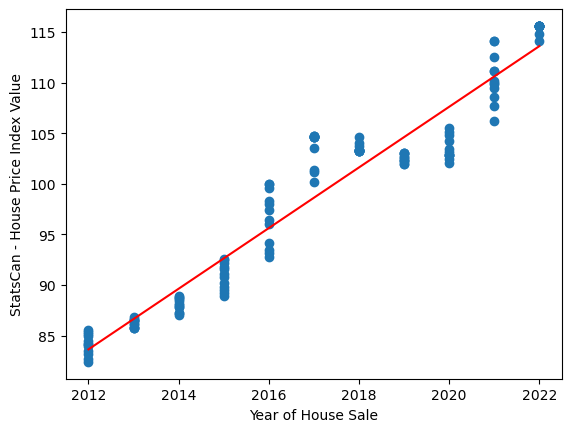

In [347]:
x_values = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["City_Region"]=="Toronto"),"Year"]     # & (vehicle_data["engine"]=="Petrol-Electric"),"year"]
y_values = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["City_Region"]=="Toronto"),"VALUE"] 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Year of House Sale')
plt.ylabel('StatsCan - House Price Index Value')
plt.show()

In [337]:
#Establish Year and VALUE  Variable for Plot purposes for each City_Region Independently.

Toronto_Year = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Toronto"),"Year"].astype(float) #.drop_duplicates(keep='last').sort_values( ascending=True).reset_index()
print(Toronto_Year)
Toronto_xValue = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Toronto"),"date_diff_months"].astype(float)
print(Toronto_xValue)
StatCan_Index_Toronto = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Toronto"),"VALUE"].astype(float) #not dropping dupes or sorting the data.
print(StatCan_Index_Toronto)
Avg_HP_Toronto = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Toronto"),"Avg_HousePrice"].astype(float) #not dropping dupes or sorting the data.
print(Avg_HP_Toronto)

1      2012.0
4      2012.0
7      2012.0
10     2012.0
13     2012.0
        ...  
382    2022.0
385    2022.0
388    2022.0
391    2022.0
394    2022.0
Name: Year, Length: 132, dtype: float64
1        0.0
4        1.0
7        2.0
10       3.0
13       4.0
       ...  
382    128.0
385    129.0
388    130.0
391    131.0
394    132.0
Name: date_diff_months, Length: 132, dtype: float64
1       82.4
4       82.7
7       83.2
10      83.5
13      84.0
       ...  
382    115.6
385    115.6
388    115.6
391    115.6
394    115.6
Name: VALUE, Length: 132, dtype: float64
1      420950.0
4      456537.0
7      450750.0
10     464075.0
13     472839.0
         ...   
382    939625.0
385    957500.0
388    964125.0
391    964125.0
394    939125.0
Name: Avg_HousePrice, Length: 132, dtype: float64


In [338]:
Montreal_Year = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Montréal"),"Year"].astype(float)#.drop_duplicates(keep='last').sort_values( ascending=True).reset_index()
print(Montreal_Year)
Montreal_xValue = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Montréal"),"date_diff_months"].astype(float)
print(Montreal_xValue)
StatCan_Index_Montreal = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Montréal"),"VALUE"].astype(float) #not dropping dupes or sorting the data.
print(StatCan_Index_Montreal)
Avg_HP_Montreal = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Montréal"),"Avg_HousePrice"].astype(float) #not dropping dupes or sorting the data.
print(Avg_HP_Montreal)

0      2012.0
3      2012.0
6      2012.0
9      2012.0
12     2012.0
        ...  
381    2022.0
384    2022.0
387    2022.0
390    2022.0
393    2022.0
Name: Year, Length: 132, dtype: float64
0        0.0
3        1.0
6        2.0
9        3.0
12       4.0
       ...  
381    128.0
384    129.0
387    130.0
390    131.0
393    132.0
Name: date_diff_months, Length: 132, dtype: float64
0       96.5
3       96.6
6       96.7
9       96.7
12      96.8
       ...  
381    151.5
384    151.4
387    152.0
390    151.3
393    151.7
Name: VALUE, Length: 132, dtype: float64
0      420950.0
3      456537.0
6      450750.0
9      464075.0
12     472839.0
         ...   
381    939625.0
384    957500.0
387    964125.0
390    964125.0
393    939125.0
Name: Avg_HousePrice, Length: 132, dtype: float64


In [339]:
Vancouver_Year = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Vancouver") & (Inner_to_Final_City_Filtered_DF["Month"]=="05"),"Year"]#.drop_duplicates(keep='last').sort_values( ascending=True).reset_index()
print(Vancouver_Year)
Vancouver_xValue = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Vancouver"),"date_diff_months"].astype(float)
print(Vancouver_xValue)
StatCan_Index_Vancouver = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Vancouver") & (Inner_to_Final_City_Filtered_DF["Month"]=="05"),"VALUE"] #not dropping dupes or sorting the data.
print(StatCan_Index_Vancouver)
Avg_HP_Vancouver = Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Vancouver") & (Inner_to_Final_City_Filtered_DF["Month"]=="05"),"Avg_HousePrice"] #not dropping dupes or sorting the data.
print(Avg_HP_Vancouver)


Series([], Name: Year, dtype: float64)
2        0.0
5        1.0
8        2.0
11       3.0
14       4.0
       ...  
383    128.0
386    129.0
389    130.0
392    131.0
395    132.0
Name: date_diff_months, Length: 132, dtype: float64
Series([], Name: VALUE, dtype: float64)
Series([], Name: Avg_HousePrice, dtype: float64)


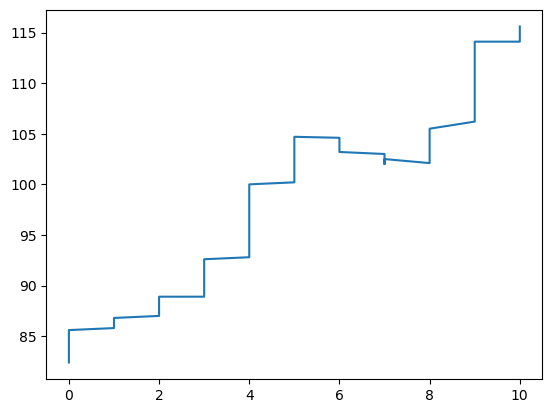

In [340]:
StatsCan_Toronto_Plot = plt.plot(
    Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["NewHousePrice_Index_Type"]=="Total (house and land)") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Toronto"),'date_diff_years' ]  # "Year"]
     ,
     Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Toronto"),"VALUE"])

#Simpler approach taken using URL => https://realpython.com/pandas-plot-python/
#Very code heavy and likely not as dynamic as expected to plot all 3 lines together.

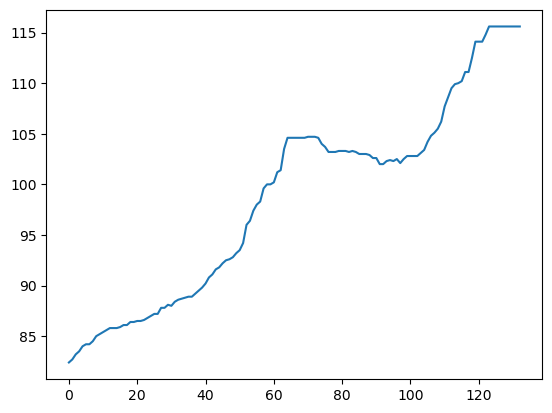

In [341]:
StatsCan_Toronto_Plot2 = plt.plot(
   Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["NewHousePrice_Index_Type"]=="Total (house and land)") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Toronto"),'date_diff_months' ]  # "Year"]
     ,
     Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Toronto"),"VALUE"])

#Simpler approach taken using URL => https://realpython.com/pandas-plot-python/
#Very code heavy and likely not as dynamic as expected to plot all 3 lines together.

In [342]:
Tor_Date_Index =Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["City_Region"]=="Toronto"), "DATE"]#  Inner_to_Final_City_Filtered_DF['DATE']
Tor_dates = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').time() for d in Tor_Date_index]
x = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').time() for d in dates]


NameError: name 'Tor_Date_index' is not defined

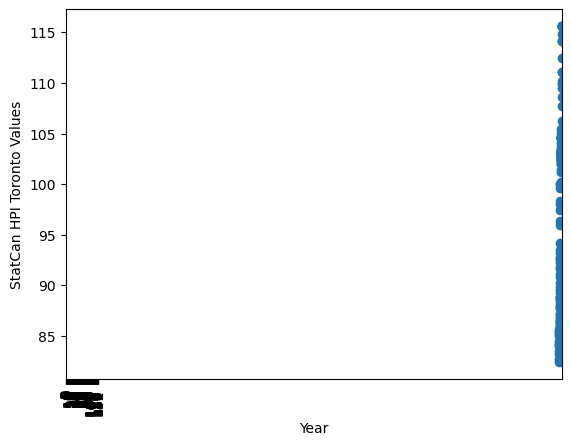

In [ ]:
StatCan_Toronto_Scatter = plt.scatter(Toronto_Year,StatCan_Index_Toronto)
plt.xticks(Toronto_xValue, rotation=90)
plt.xlabel('Year')
plt.ylabel('StatCan HPI Toronto Values')
plt.show()

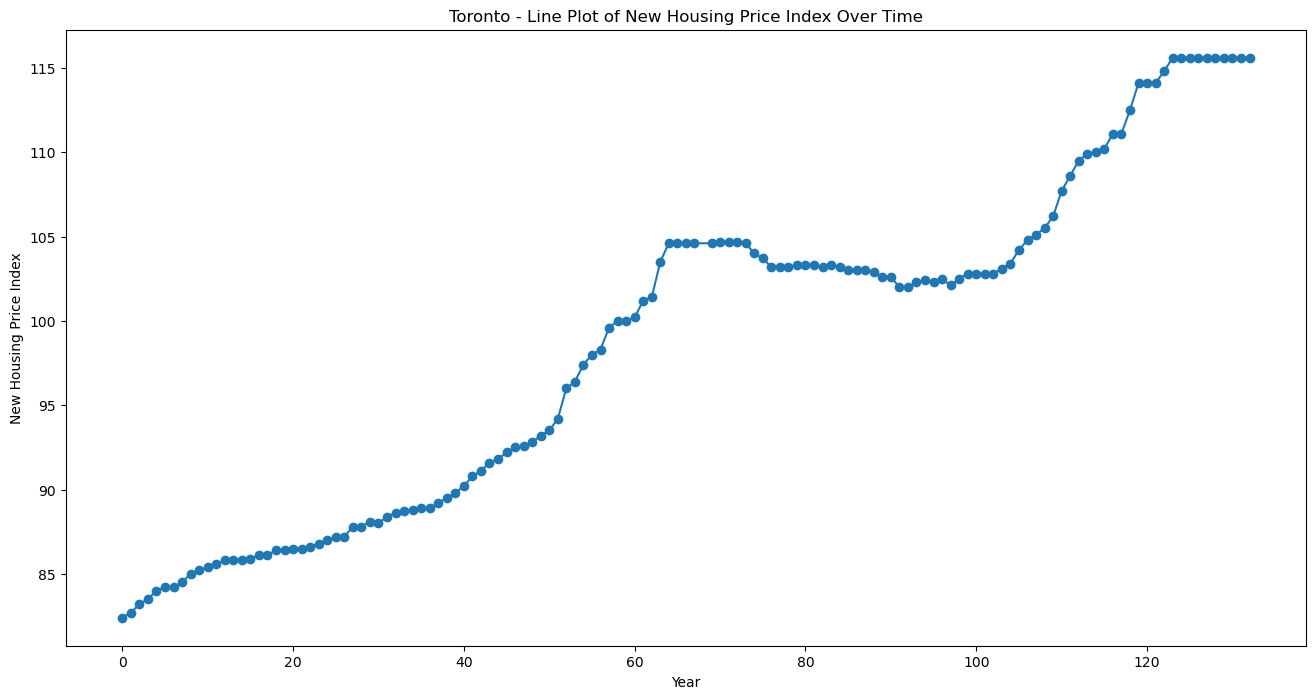

In [ ]:
# #line plot
# # # Extract the 'Year' and 'VALUE' columns for the line plot
#years = TotalPriceIndex_Analysis_DF['Year']
# housing_price_index_values = TotalPriceIndex_Analysis_DF['VALUE']

plt.figure(figsize=(16,8))

# # Plot the line plot
plt.plot(Toronto_xValue, StatCan_Index_Toronto, marker='o', linestyle='-')


# # # Add labels and title
plt.xlabel('Year')
plt.ylabel('New Housing Price Index')
plt.title('Toronto - Line Plot of New Housing Price Index Over Time')

# # Display the line plot
plt.show()

In [343]:
xvalue_Tor = Toronto_xValue   # Toronto_Year
yvalue_Tor = StatsCan_Toronto_Plot


d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(xvalue_Tor,yvalue_Tor)

TypeError: unsupported operand type(s) for /: 'Line2D' and 'int'

ValueError: x and y must have same first dimension, but have shapes (132,) and (1,)

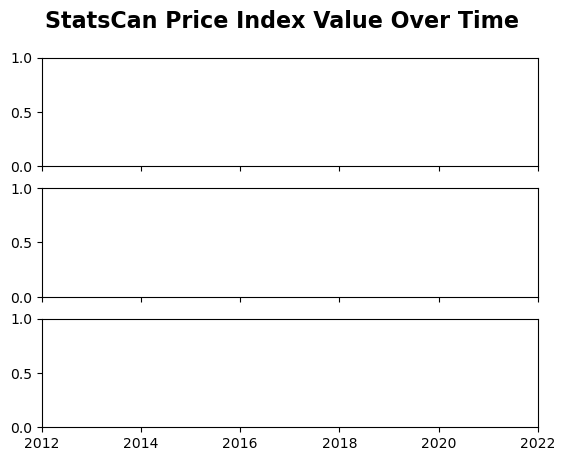

In [ ]:
#attempting to do all 3 on one chart with the StatsCan data via the Vehcicles solution.

# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("StatsCan Price Index Value Over Time", fontsize=16, fontweight="bold")

#ax1.set_xlim(min(RIGHT_to_Final_City_Filtered_DF['Year']), max(RIGHT_to_Final_City_Filtered_DF['Year']))
ax1.set_xlim(min(Toronto_Year), max(Toronto_Year))
ax1.plot(Toronto_Year, StatsCan_Toronto_Plot, linewidth=1, marker="o")
ax1.plot(Toronto_Year, pe_fit, "b--", linewidth=1)
ax1.set_ylabel("Toronto Index Values")

ax2.plot(year, petrol_cars, linewidth=1, marker="o", color="y")
ax2.plot(year, p_fit, "y--", linewidth=1)
ax2.set_ylabel("Petrol Cars")

ax3.plot(year, diesel_cars, linewidth=1, marker="o", color="g")
ax3.plot(year, d_fit, "g--", linewidth=1)
ax3.set_ylabel("Diesel Cars")
ax3.set_xlabel("Year")

plt.show()

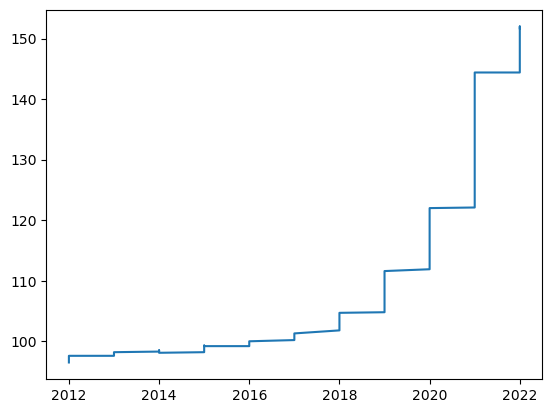

In [ ]:
StatsCan_Montreal_Plot = plt.plot(
     Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["NewHousePrice_Index_Type"]=="Total (house and land)") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Montréal"),"Year"]
    ,
    Inner_to_Final_City_Filtered_DF.loc[(RInner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Montréal"),"VALUE"])

#Simpler approach taken using URL => https://realpython.com/pandas-plot-python/
#Very code heavy and likely not as dynamic as expected to plot all 3 lines together.

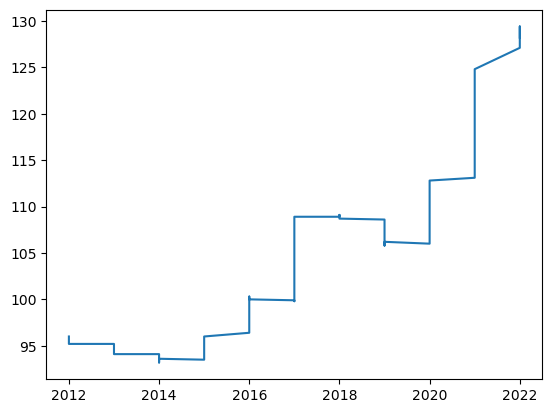

In [ ]:
StatsCan_Vancouver_Plot = plt.plot(
    Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["NewHousePrice_Index_Type"]=="Total (house and land)") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Vancouver"),"Year"]
    ,
    Inner_to_Final_City_Filtered_DF.loc[(Inner_to_Final_City_Filtered_DF["UOM"]=="Index, 201612=100") & (Inner_to_Final_City_Filtered_DF["City_Region"]=="Vancouver"),"VALUE"])

#Simpler approach taken using URL => https://realpython.com/pandas-plot-python/
#Very code heavy and likely not as dynamic as expected to plot all 3 lines together.

In [ ]:
#Establish the 3 Avg_HP "City_Region" variables for Plot purposes.

Avg_HP_Toronto

In [ ]:
#Create StatsCan Plotting DF using the "VALUE" column.
StatCan_Index_Plot_Df = Inner_to_Final_City_Filtered_DF['Year','City_Region','VALUE','DATE','date_diff_years']




#Below edited to give us a "toronto example" ... for the plotting needs.
#+
#diesel_cars = vehicle_data.loc[(vehicle_data["type"]=="Cars") & (vehicle_data["engine"]=="Diesel"), "number"]   # NEED "City_Region" ... LOC to ==  "Toronto"/2/3 ... &  == Total (house and land),'value'
#d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(
#    year, diesel_cars)

In [ ]:
#Create Our Sourced Data Plotting DF using the "Avg_HousePrice" column.

In [ ]:
# data = {
#     'City_region': ['RIGHT_to_Final_City_Filtered_DF'],
#     'Column1': [10, 25, 35, 50, 60, 75]
# }
# df = pd.DataFrame(data)
# grouped_df = df.groupby('City_region')

In [ ]:
#Extract sample data to validate that the STATUS not in funciton above was successful.
Output_Folder = 'Output/'
Output_file = Output_Folder + 'HP_to_Final_City_Filtered_DF.csv'

# Save the combined data to a single CSV file
HP_to_Final_City_Filtered_DF.to_csv(Output_file, index=False, encoding='utf-8-sig') # ref for variation in export encoding https://stackoverflow.com/questions/57152985/what-is-the-difference-between-utf-8-and-utf-8-sig

In [ ]:
#Extract sample data to validate that the STATUS not in funciton above was successful.
Output_Folder = 'Output/'
Output_file = Output_Folder + 'RIGHT_to_Final_City_Filtered_DF.csv'

# Save the combined data to a single CSV file
RIGHT_to_Final_City_Filtered_DF.to_csv(Output_file, index=False, encoding='utf-8-sig') # ref for variation in export encoding https://stackoverflow.com/questions/57152985/what-is-the-difference-between-utf-8-and-utf-8-sig

In [ ]:
# #box and whisker plot

# # #Extract the 'VALUE' column for the histogram
# housing_price_index_values = TotalPriceIndex_Analysis_DF['VALUE']

# #Plot the histogram with 15 bins
# plt.hist(housing_price_index_values, bins=15, edgecolor='black')

# #Add labels and title
# plt.xlabel('New Housing Price Index')
# plt.ylabel('Frequency')
# plt.title('Histogram of New Housing Price Index with 15 Bins')

# #Display the histogram
# plt.show() 
# #--------------------------------------------------------------------

# #line plot
# # # Extract the 'Year' and 'VALUE' columns for the line plot
# years = TotalPriceIndex_Analysis_DF['Year']
# housing_price_index_values = TotalPriceIndex_Analysis_DF['VALUE']

# plt.figure(figsize=(16,8))

# # Plot the line plot
# plt.plot(years, housing_price_index_values, marker='o', linestyle='-')


# # # Add labels and title
# plt.xlabel('Year')
# plt.ylabel('New Housing Price Index')
# plt.title('Line Plot of New Housing Price Index Over Time')

# # Display the line plot
# plt.show()

# #--------------------------------------------------------------------
# # Extract the relevant columns for the bubble plot
# housing_price_index_values = TotalPriceIndex_Analysis_DF['VALUE']
# years = TotalPriceIndex_Analysis_DF['Year']
# demand_changes = covid_data['Demand_Changes']  # Replace 'Demand_Changes' with the actual column name

# # Calculate bubble sizes based on the demand_changes variable (you can use any other variable of interest)
# bubble_sizes = demand_changes * 100  # Adjust the multiplier to control bubble size

# # Create the bubble plot
# plt.figure(figsize=(10, 6))
# plt.scatter(years, housing_price_index_values, s=bubble_sizes, alpha=0.7, c='blue')

# # Add labels and title
# plt.xlabel('Year')
# plt.ylabel('New Housing Price Index')
# plt.title('Bubble Plot of New Housing Price Index Over Time with Demand Changes')

# # Display the bubble plot
# plt.show()